In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
loan_dt=pd.read_csv(r"C:\Users\USER\Downloads\loan (1).csv",low_memory=False)

In [3]:
loan_dt.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
loan_dt.shape

(39717, 111)

In [5]:
loan_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
loan_dt.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
loan=loan_dt

In [8]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [9]:
missing_cols=loan.columns[loan.isna().sum()*100/loan.shape[0]>90] 

In [10]:
loan=loan.drop(missing_cols,axis=1)

In [11]:
loan.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [12]:
loan.shape

(39717, 55)

In [13]:
loan=loan.drop(["desc","mths_since_last_delinq"],axis=1)

In [14]:
loan.isna().sum()/len(loan.index)*100

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [15]:
loan.shape

(39717, 53)

In [16]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [17]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [18]:
loan['int_rate']

0        10.65%
1        15.27%
2        15.96%
3        13.49%
4        12.69%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 39717, dtype: object

In [19]:
loan['int_rate']=loan['int_rate'].str.replace("%"," ").astype("float")

In [20]:
loan['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64

In [21]:
loan['emp_length']

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 39717, dtype: object

In [22]:
loan['emp_length'].isna().sum()

1075

In [23]:
emp_ind=loan[loan['emp_length'].isna()].index

In [24]:
loan=loan[~loan['emp_length'].isnull()]    ## data without null rows of emp_length

In [25]:
loan['emp_length'].dtype

dtype('O')

In [26]:
import re  ## regular expression

In [27]:
loan['emp_length']=loan['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

In [28]:
loan['emp_length']

0        10
1         1
2        10
3        10
4         1
         ..
39712     4
39713     3
39714     1
39715     1
39716     1
Name: emp_length, Length: 38642, dtype: object

In [29]:
loan['emp_length']=loan['emp_length'].astype(int)

In [30]:
loan['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

In [31]:
loan=loan[loan['loan_status']!="Current"]

In [32]:
loan['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Name: loan_status, dtype: int64

In [33]:
loan['issue_d']

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
5        Dec-11
          ...  
39712    Jul-07
39713    Jul-07
39714    Jul-07
39715    Jul-07
39716    Jun-07
Name: issue_d, Length: 37544, dtype: object

In [34]:
from datetime import datetime

In [35]:
loan['issue_d']=loan['issue_d'].apply(lambda x: datetime.strptime(x,'%b-%y'))

In [36]:
loan['isd_month']=loan['issue_d'].apply(lambda x:x.month)

In [37]:
loan['isd_year']=loan['issue_d'].apply(lambda x:x.year)

In [38]:
loan['revol_util']

0        83.70%
1         9.40%
2        98.50%
3           21%
5        28.30%
          ...  
39712    13.10%
39713    26.90%
39714    19.40%
39715     0.70%
39716    51.50%
Name: revol_util, Length: 37544, dtype: object

In [39]:
loan['revol_util']=loan['revol_util'].str.replace("%","").astype(float)

In [40]:
loan['revol_util']

0        83.7
1         9.4
2        98.5
3        21.0
5        28.3
         ... 
39712    13.1
39713    26.9
39714    19.4
39715     0.7
39716    51.5
Name: revol_util, Length: 37544, dtype: float64

In [41]:
loan['pymnt_plan'].unique()

array(['n'], dtype=object)

In [42]:
loan['earliest_cr_line']

0        Jan-85
1        Apr-99
2        Nov-01
3        Feb-96
5        Nov-04
          ...  
39712    Nov-90
39713    Dec-86
39714    Oct-98
39715    Nov-88
39716    Oct-03
Name: earliest_cr_line, Length: 37544, dtype: object

In [43]:
loan['initial_list_status'].unique()

array(['f'], dtype=object)

In [44]:
loan['out_prncp_inv'].unique()

array([0.])

In [45]:
loan['last_pymnt_d']

0        Jan-15
1        Apr-13
2        Jun-14
3        Jan-15
5        Jan-15
          ...  
39712    Jul-10
39713    Jul-10
39714    Apr-08
39715    Jan-08
39716    Jun-10
Name: last_pymnt_d, Length: 37544, dtype: object

In [46]:
loan['collections_12_mths_ex_med'].unique()

array([ 0., nan])

In [47]:
loan['policy_code'].unique()

array([1], dtype=int64)

In [48]:
loan['application_type'].unique()

array(['INDIVIDUAL'], dtype=object)

In [49]:
loan['acc_now_delinq'].unique()

array([0], dtype=int64)

In [50]:
loan['delinq_amnt'].unique()

array([0], dtype=int64)

In [51]:
loan['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2., nan])

In [52]:
loan['tax_liens'].unique()

array([ 0., nan])

In [53]:
req_cols = req_cols=['loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
        'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt',
     'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens', 'isd_month', 'isd_year','loan_status']

In [54]:
loan[req_cols]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens,isd_month,isd_year,loan_status
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,...,0.00,0.00,0.00,171.62,0.0,0.0,0.0,12,2011,Fully Paid
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,...,0.00,117.08,1.11,119.66,0.0,0.0,0.0,12,2011,Charged Off
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,...,0.00,0.00,0.00,649.91,0.0,0.0,0.0,12,2011,Fully Paid
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,...,16.97,0.00,0.00,357.48,0.0,0.0,0.0,12,2011,Fully Paid
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,...,0.00,0.00,0.00,161.03,0.0,0.0,0.0,12,2011,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36 months,8.07,78.42,A,A4,4,MORTGAGE,...,0.00,0.00,0.00,80.90,NaN,NaN,NaN,7,2007,Fully Paid
39713,8500,8500,875.0,36 months,10.28,275.38,C,C1,3,RENT,...,0.00,0.00,0.00,281.94,NaN,NaN,NaN,7,2007,Fully Paid
39714,5000,5000,1325.0,36 months,8.07,156.84,A,A4,1,MORTGAGE,...,0.00,0.00,0.00,0.00,NaN,NaN,NaN,7,2007,Fully Paid
39715,5000,5000,650.0,36 months,7.43,155.38,A,A2,1,MORTGAGE,...,0.00,0.00,0.00,0.00,NaN,NaN,NaN,7,2007,Fully Paid


In [55]:
new_loand=loan[req_cols]

In [56]:
new_loand.isna().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
purpose                       0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   47
total_acc                     0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
chargeoff_within_12_mths     56
pub_rec_bankruptcies        697
tax_lien

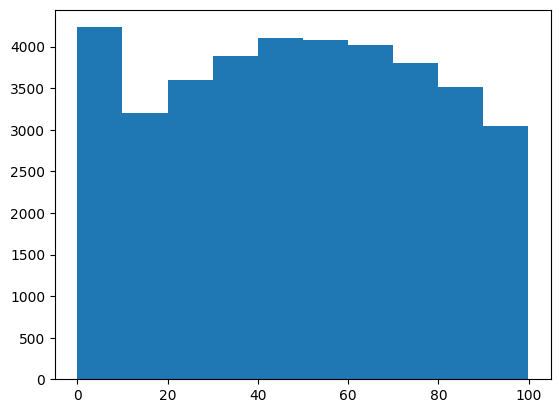

In [57]:
plt.hist(new_loand['revol_util'])
plt.show()

In [58]:
median_ru=new_loand['revol_util'].median()
new_loand['revol_util']=new_loand['revol_util'].fillna(median_ru)

C:\Users\USER\AppData\Local\Temp\ipykernel_19528\817351096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_loand['revol_util']=new_loand['revol_util'].fillna(median_ru)


In [59]:
new_loand.isna().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
purpose                       0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
chargeoff_within_12_mths     56
pub_rec_bankruptcies        697
tax_lien

In [60]:
new_loand["chargeoff_within_12_mths"].value_counts()

0.0    37488
Name: chargeoff_within_12_mths, dtype: int64

In [61]:
new_loand=new_loand.drop('chargeoff_within_12_mths',axis=1)

In [62]:
new_loand["pub_rec_bankruptcies"].unique()

array([ 0.,  1.,  2., nan])

In [63]:
new_loand['pub_rec_bankruptcies']=new_loand['pub_rec_bankruptcies'].fillna(0)

In [64]:
new_loand['tax_liens'].unique()

array([ 0., nan])

In [65]:
new_loand=new_loand.drop("tax_liens",axis=1)

In [66]:
new_loand.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
purpose                    0
dti                        0
delinq_2yrs                0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_amnt            0
pub_rec_bankruptcies       0
isd_month                  0
isd_year                   0
loan_status                0
dtype: int64

In [67]:
new_loand.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                37544 non-null  int64  
 1   funded_amnt              37544 non-null  int64  
 2   funded_amnt_inv          37544 non-null  float64
 3   term                     37544 non-null  object 
 4   int_rate                 37544 non-null  float64
 5   installment              37544 non-null  float64
 6   grade                    37544 non-null  object 
 7   sub_grade                37544 non-null  object 
 8   emp_length               37544 non-null  int32  
 9   home_ownership           37544 non-null  object 
 10  annual_inc               37544 non-null  float64
 11  verification_status      37544 non-null  object 
 12  purpose                  37544 non-null  object 
 13  dti                      37544 non-null  float64
 14  delinq_2yrs           

In [68]:
new_loand['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [69]:
mask={' 36 months':36,' 60 months':60}

In [70]:
new_loand["term"]=new_loand['term'].map(mask)

In [71]:
new_loand

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,isd_month,isd_year,loan_status
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,...,5000.00,863.16,0.00,0.00,0.00,171.62,0.0,12,2011,Fully Paid
1,2500,2500,2500.0,60,15.27,59.83,C,C4,1,RENT,...,456.46,435.17,0.00,117.08,1.11,119.66,0.0,12,2011,Charged Off
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,...,2400.00,605.67,0.00,0.00,0.00,649.91,0.0,12,2011,Fully Paid
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,...,10000.00,2214.92,16.97,0.00,0.00,357.48,0.0,12,2011,Fully Paid
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,...,5000.00,632.21,0.00,0.00,0.00,161.03,0.0,12,2011,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36,8.07,78.42,A,A4,4,MORTGAGE,...,2500.00,322.97,0.00,0.00,0.00,80.90,0.0,7,2007,Fully Paid
39713,8500,8500,875.0,36,10.28,275.38,C,C1,3,RENT,...,8500.00,1413.49,0.00,0.00,0.00,281.94,0.0,7,2007,Fully Paid
39714,5000,5000,1325.0,36,8.07,156.84,A,A4,1,MORTGAGE,...,5000.00,272.16,0.00,0.00,0.00,0.00,0.0,7,2007,Fully Paid
39715,5000,5000,650.0,36,7.43,155.38,A,A2,1,MORTGAGE,...,5000.00,174.20,0.00,0.00,0.00,0.00,0.0,7,2007,Fully Paid


In [72]:
new_loand.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
purpose                    0
dti                        0
delinq_2yrs                0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_amnt            0
pub_rec_bankruptcies       0
isd_month                  0
isd_year                   0
loan_status                0
dtype: int64

In [73]:
new_loand["verification_status"].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [74]:
new_loand['home_ownership'].value_counts()

RENT        18078
MORTGAGE    16595
OWN          2770
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [75]:
new_loand.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
purpose                    0
dti                        0
delinq_2yrs                0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_amnt            0
pub_rec_bankruptcies       0
isd_month                  0
isd_year                   0
loan_status                0
dtype: int64

In [76]:
new_loand.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                37544 non-null  int64  
 1   funded_amnt              37544 non-null  int64  
 2   funded_amnt_inv          37544 non-null  float64
 3   term                     37544 non-null  int64  
 4   int_rate                 37544 non-null  float64
 5   installment              37544 non-null  float64
 6   grade                    37544 non-null  object 
 7   sub_grade                37544 non-null  object 
 8   emp_length               37544 non-null  int32  
 9   home_ownership           37544 non-null  object 
 10  annual_inc               37544 non-null  float64
 11  verification_status      37544 non-null  object 
 12  purpose                  37544 non-null  object 
 13  dti                      37544 non-null  float64
 14  delinq_2yrs           

In [77]:
new_loand.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies',
       'isd_month', 'isd_year', 'loan_status'],
      dtype='object')

In [78]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
new_loand['grade']=le.fit_transform(new_loand['grade'])

In [79]:
new_loand.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies',
       'isd_month', 'isd_year', 'loan_status'],
      dtype='object')

In [80]:
x=new_loand.drop("loan_status",axis=1)
y=new_loand["loan_status"]

In [81]:
x=pd.get_dummies(x)

In [82]:
## decision tree,bagging classifier,random forest

In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=134)

In [84]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

In [85]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix

In [86]:
confusion_matrix(y_test,y_pred)

array([[1093,   30],
       [  30, 6356]], dtype=int64)

In [87]:
accuracy_score(y_test,y_pred)

0.9920095884938074

In [89]:
from sklearn.ensemble import BaggingClassifier

In [90]:
base=DecisionTreeClassifier()
bg=BaggingClassifier(base_estimator=base,n_estimators=250)
bg.fit(x_train,y_train)
y_pred=bg.predict(x_test)

In [91]:
accuracy_score(y_test,y_pred)

0.9954721001464909

In [92]:
confusion_matrix(y_test,y_pred)

array([[1089,   34],
       [   0, 6386]], dtype=int64)

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
rf=RandomForestClassifier(max_depth=16,n_estimators=150)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [95]:
accuracy_score(y_test,y_pred)

0.994273538420562

In [96]:
confusion_matrix(y_test,y_pred)

array([[1080,   43],
       [   0, 6386]], dtype=int64)

In [97]:
from sklearn.model_selection import cross_val_score

In [98]:
dt = DecisionTreeClassifier()

cv_results = cross_val_score(dt, x, y, cv = 5, scoring="accuracy")
cv_results.mean()

0.9916362982073794

In [99]:
bg = BaggingClassifier(base_estimator=base, n_estimators= 150)

cv_results = cross_val_score(bg, x, y, cv = 5, scoring="accuracy")
cv_results.mean()

0.995498482978302

In [100]:
rt = RandomForestClassifier()

cv_results = cross_val_score(rt, x, y, cv = 5, scoring="accuracy")
cv_results.mean()

0.9940868223271482

In [101]:
num_cols=['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment','emp_length','annual_inc','dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies',
       'isd_month', 'isd_year']

In [102]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x.loc[:,num_cols]=sc.fit_transform(x[num_cols])

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [105]:
accuracy_score(y_test,y_pred)

0.9992009588493808

In [106]:
from sklearn.neighbors import KNeighborsClassifier

In [107]:
knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [108]:
accuracy_score(y_test,y_pred)

0.9483286722599548

In [109]:
from sklearn.svm import SVC

In [110]:
sv=SVC()
sv.fit(x_train,y_train)
y_pred=sv.predict(x_test)

In [111]:
accuracy_score(y_test,y_pred)

0.9722999067785324